# Exercises - GEO4902-03 - Ensemble Prediction

[Save as jupyter notebook, with your name in the filename, and upload on canvas]

# Exercise 03-02 - Ensemble prediction of a polar low

In [1]:
# import packages
import xarray as xr
import math
import numpy as np
import cartopy as cy
from matplotlib import pyplot as plt
from cmcrameri import cm

In [2]:
year =  '2020'
day  =  '03'
month = '02'
hour_1  ='18'

url='https://thredds.met.no/thredds/dodsC/meps25epsarchive/' +year+'/'+month+'/'+day+'/meps_extracted_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)

### Find a specific point and plot the forecast. 


In [3]:
def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslat,abslon)
    
    y, x = np.where(c == np.min(c))

    y=int(y)
    x=int(x)
   
    return (y,x)

In [4]:
[y_loc, x_loc] = findindex(forecast_1.latitude,forecast_1.longitude,69.649,18.956) # Tromsø

print("Tromsø_forecast 1: latitude: {}; longitude: {}".format(forecast_1.latitude.isel(y=y_loc,x=x_loc).round(2), forecast_1.longitude.isel(y=y_loc,x=x_loc).round(2)))

Tromsø_forecast 1: latitude: <xarray.DataArray 'latitude' ()> Size: 8B
array(69.62)
Coordinates:
    x          float32 4B 1.55e+05
    y          float32 4B 7.432e+05
    longitude  float64 8B 18.98
    latitude   float64 8B 69.62
Attributes:
    units:          degree_north
    long_name:      latitude
    standard_name:  latitude
    _ChunkSizes:    [949 889]; longitude: <xarray.DataArray 'longitude' ()> Size: 8B
array(18.98)
Coordinates:
    x          float32 4B 1.55e+05
    y          float32 4B 7.432e+05
    longitude  float64 8B 18.98
    latitude   float64 8B 69.62
Attributes:
    units:          degree_east
    long_name:      longitude
    standard_name:  longitude
    _ChunkSizes:    [949 889]


/tmp/ipykernel_8147/2975422917.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)
/tmp/ipykernel_8147/2975422917.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)


#### For example wind speed forecasts

In [5]:
member=1
accpp_point_forecast_1 = forecast_1['wind_speed'].isel(height3=0, ensemble_member=0, y=y_loc, x=x_loc)
accpp_point_forecast_1 = accpp_point_forecast_1.assign_attrs({'long_name': 'Wind speed'}) #rename attribute of long name as it should be wind speed and not direction

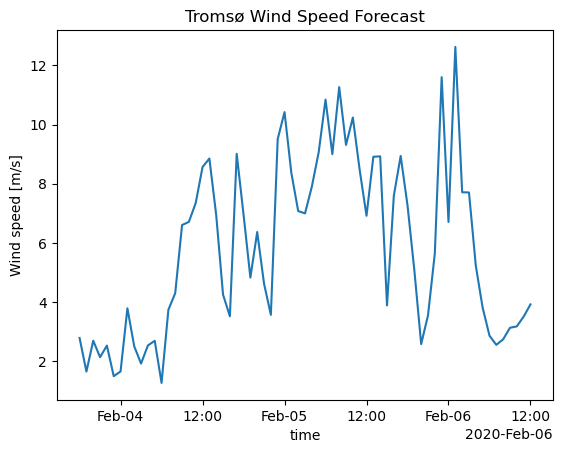

In [6]:
f, ax = plt.subplots()                              # define figure

accpp_point_forecast_1.plot.line(ax = ax, x='time', add_legend=True)                             # plot with xarray.plot function
plt.title("Tromsø Wind Speed Forecast");

### Plot forecast on a map
Mean sea level pressure

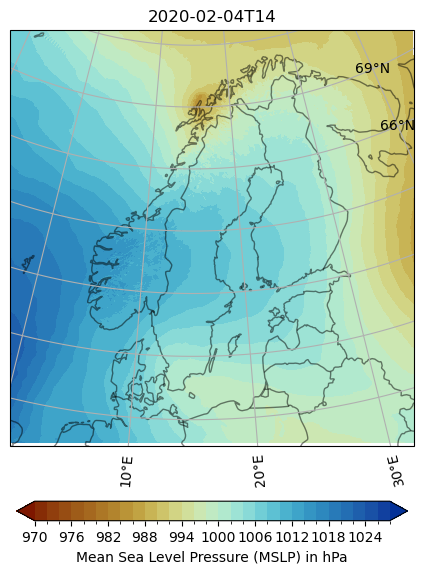

In [7]:
timestep = 20
mlevel = 0
member = 7

projection = cy.crs.Stereographic(central_latitude=75, central_longitude=15.0, )
f, axsm = plt.subplots(1,1, subplot_kw={'projection':projection}, figsize=[7.2, 7.2])

# plot cosmetics
axsm.set_extent([1, 32, 52, 72], cy.crs.PlateCarree())
axsm.add_feature(cy.feature.COASTLINE, alpha=0.5)
axsm.add_feature(cy.feature.BORDERS, alpha=0.5)
gl = axsm.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=True

(forecast_1['air_pressure_at_sea_level'].isel(time=timestep, height_above_msl=mlevel, ensemble_member=member)/100).plot.pcolormesh(ax=axsm, 
                                                                                                                   x='longitude', 
                                                                                                                   y='latitude',
                                                                                                                   cmap=cm.roma,
                                                                                                                   extend='both',
                                                                                                                   levels=np.arange(970,1030, 2),
                                                                                                                   transform=cy.crs.PlateCarree(),
                                                                                                                   cbar_kwargs={'orientation':'horizontal','label':'{} in hPa'.format(forecast_1['air_pressure_at_sea_level'].attrs['long_name'],), 'shrink':0.7, 'pad':0.1})


plt.title (np.datetime_as_string(forecast_1.time[timestep],unit='h'));